# Symmetric model evaluation

In [24]:
import sys
sys.path.append("..")
from ProbabilisticParcellation.evaluate_da import *
from ProbabilisticParcellation.util import *
from Functional_Fusion.dataset import * 
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

fname = f'/Models/Evaluation/eval_all_asym_K-10_to_68_MdPoNiIbWmDeSo_CV.tsv'
plot_diffK(fname)

This notebook plots the DCBC and cosine error evaluation of the different parcellations

0          asym
1          asym
2          asym
3          asym
4          asym
         ...   
139    atl-Ji10
140    atl-Ji10
141    atl-Ji10
142    atl-Ji10
143    atl-Ji10
Name: name, Length: 144, dtype: object

## Evaluation on old parcellations

In [5]:
D

,model_name,test_data,subj_num,dcbc,name
0,asym_Md_space-MNISymC3_K-10,Mdtb,0,0.101467,asym
1,asym_Md_space-MNISymC3_K-10,Mdtb,1,0.096007,asym
2,asym_Md_space-MNISymC3_K-10,Mdtb,2,0.051763,asym
3,asym_Md_space-MNISymC3_K-10,Mdtb,3,0.205131,asym
4,asym_Md_space-MNISymC3_K-10,Mdtb,4,0.101393,asym
...,...,...,...,...,...
139,atl-Ji10_space-MNI152NLin2009cSymC_dseg,Mdtb,19,0.086433,atl-Ji10
140,atl-Ji10_space-MNI152NLin2009cSymC_dseg,Mdtb,20,0.097446,atl-Ji10
141,atl-Ji10_space-MNI152NLin2009cSymC_dseg,Mdtb,21,0.073917,atl-Ji10
142,atl-Ji10_space-MNI152NLin2009cSymC_dseg,Mdtb,22,0.034162,atl-Ji10


## Evaluation on the new parcellations

In [49]:
# Load evaluation results
type = ['sym','asym']
K = [10,20,34]
D = pd.DataFrame()
for t in type:
    for k in K: 
        fname = base_dir + f'/Models/Evaluation_01/eval_dcbc_{t}_K-{k}.tsv'
        dcbc = pd.read_csv(fname, sep='\t')
        dcbc['type']=[t]*dcbc.shape[0]
        D=pd.concat([D,dcbc],ignore_index=True)
D

,model_name,atlas,K,train_data,train_loglik,test_data,indivtrain_ind,indivtrain_val,subj_num,dcbc_group,dcbc_indiv,type
0,asym_Md,MNISymC3,10,['Mdtb'],1.115685e+07,Mdtb,half,1,0,0.091854,0.111048,sym
1,asym_Md,MNISymC3,10,['Mdtb'],1.115685e+07,Mdtb,half,1,1,0.095631,0.167012,sym
2,asym_Md,MNISymC3,10,['Mdtb'],1.115685e+07,Mdtb,half,1,2,0.026171,0.048825,sym
3,asym_Md,MNISymC3,10,['Mdtb'],1.115685e+07,Mdtb,half,1,3,0.209580,0.296363,sym
4,asym_Md,MNISymC3,10,['Mdtb'],1.115685e+07,Mdtb,half,1,4,0.134436,0.125377,sym
...,...,...,...,...,...,...,...,...,...,...,...,...
4195,6,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.483814e+08,Ibc,half,2,7,0.021919,0.078985,asym
4196,6,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.483814e+08,Ibc,half,2,8,0.026541,0.031448,asym
4197,6,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.483814e+08,Ibc,half,2,9,0.036939,0.071233,asym
4198,6,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.483814e+08,Ibc,half,2,10,0.028013,0.057569,asym


<AxesSubplot: xlabel='test_data', ylabel='dcbc_group'>

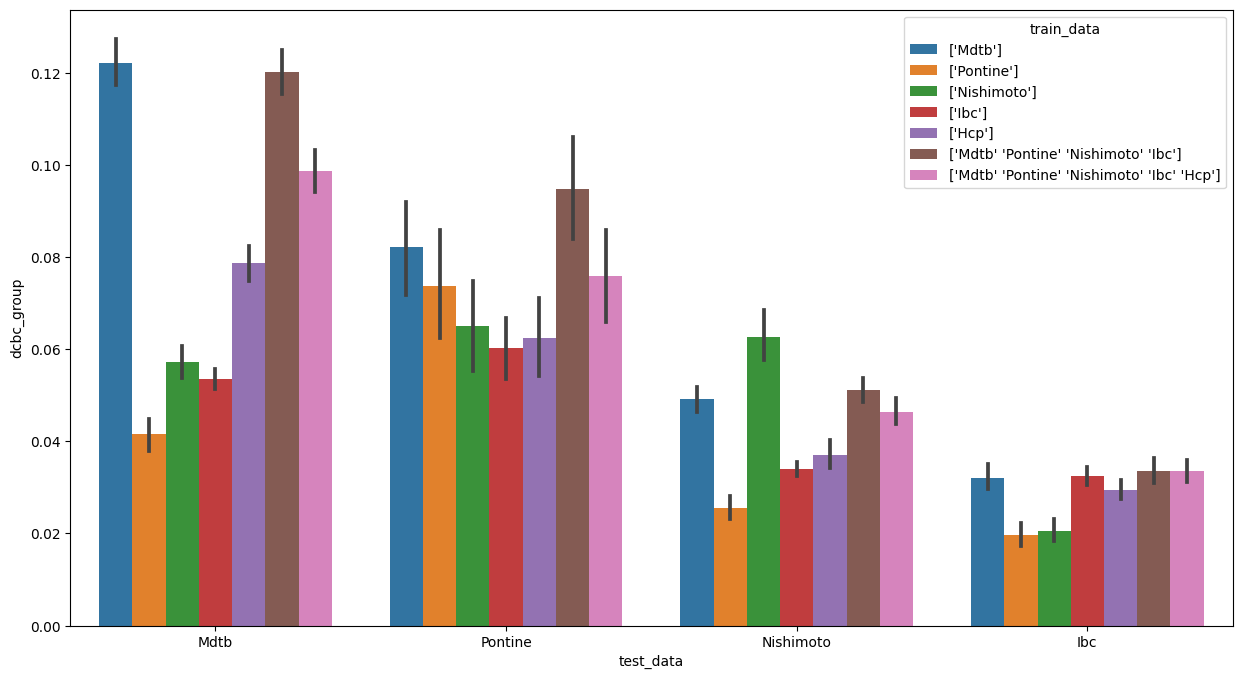

In [54]:
plt.figure(figsize=(15,8))

sb.barplot(data=D, x="test_data", y="dcbc_group", hue="train_data")
plt.tight_layout()
plt.savefig("/Users/callithrix/Documents/Conferences/SfN22/minisymposium/slides/figures/dcbc_generalization.png", dpi=100)

In [ ]:
### Compare results to DCBC for Model 04

# Compare asymmetric and symmetric

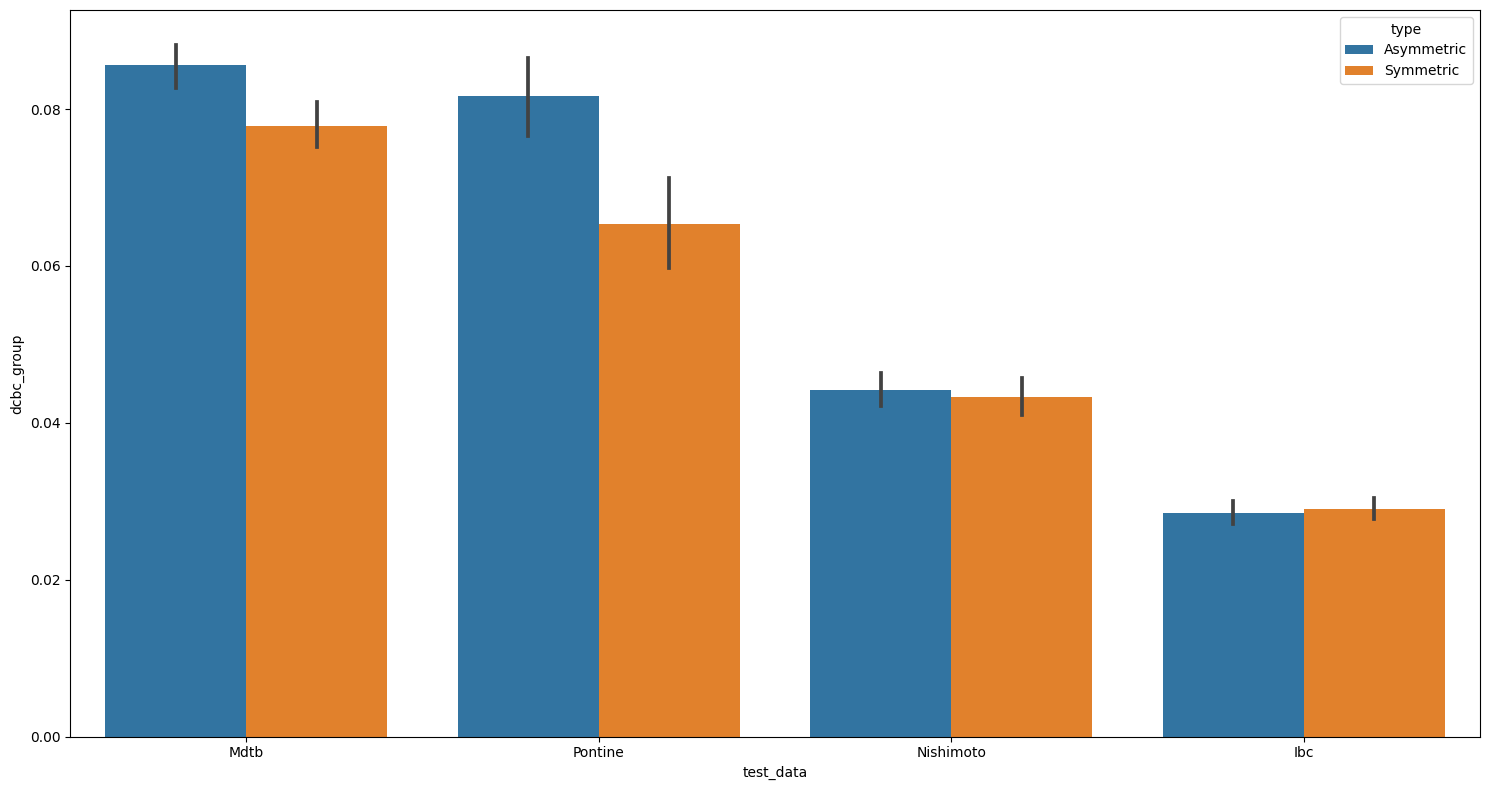

In [69]:
plt.figure(figsize=(15,8))
D['type'] = D['type'].astype('category')
D['type'] = D['type'].cat.rename_categories({'asym': 'Asymmetric', 'sym': 'Symmetric'})

sb.barplot(data=D, x="test_data", y="dcbc_group", hue="type")
plt.tight_layout()
plt.savefig("/Users/callithrix/Documents/Conferences/SfN22/minisymposium/slides/figures/dcbc_asym_vs_sym.png", dpi=100)

<AxesSubplot: xlabel='test_data', ylabel='dcbc_group'>

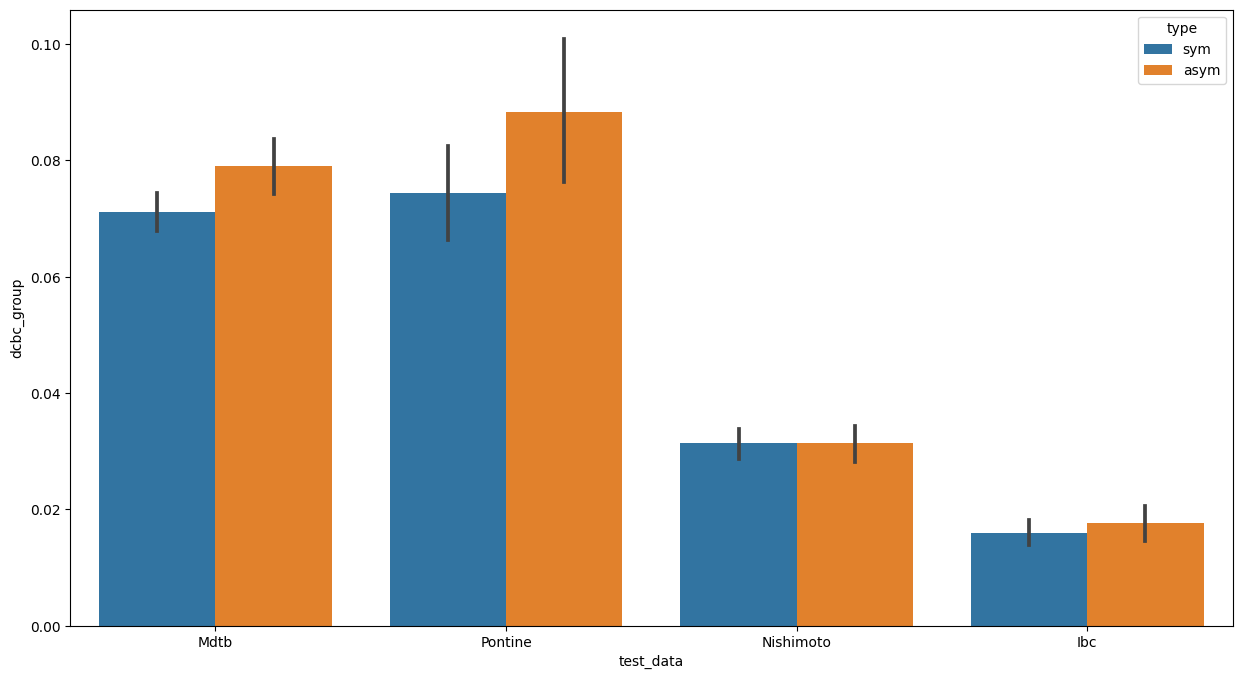

In [105]:

plt.figure(figsize=(15,8))
sb.barplot(data=D4, x="test_data", y="dcbc_group", hue="type")
# sb.barplot(data=D4, x="model_name", y="dcbc_group")

## Compare Group DCBC of model 04 (asymmetric) to Group DCBC of model 01 (first plot)

In [9]:
D4

,model_name,atlas,K,train_data,train_loglik,test_data,indivtrain_ind,indivtrain_val,subj_num,dcbc_group,dcbc_indiv,type
0,sym_MdPoNiIbHc_00,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],2.088253e+07,Mdtb,half,1,0,0.056463,0.093329,sym
1,sym_MdPoNiIbHc_00,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],2.088253e+07,Mdtb,half,1,1,0.039947,0.163373,sym
2,sym_MdPoNiIbHc_00,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],2.088253e+07,Mdtb,half,1,2,0.020854,0.065715,sym
3,sym_MdPoNiIbHc_00,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],2.088253e+07,Mdtb,half,1,3,0.138505,0.298063,sym
4,sym_MdPoNiIbHc_00,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],2.088253e+07,Mdtb,half,1,4,0.110229,0.031571,sym
...,...,...,...,...,...,...,...,...,...,...,...,...
1895,sym_MdPoNiIbHc,MNISymC3,10,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.780202e+07,Ibc,half,2,7,0.005073,0.072268,sym
1896,sym_MdPoNiIbHc,MNISymC3,10,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.780202e+07,Ibc,half,2,8,0.019214,0.028462,sym
1897,sym_MdPoNiIbHc,MNISymC3,10,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.780202e+07,Ibc,half,2,9,0.019874,0.038692,sym
1898,sym_MdPoNiIbHc,MNISymC3,10,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.780202e+07,Ibc,half,2,10,0.017016,0.013996,sym


In [19]:
D4.query( ' K == 10 & test_data == "Mdtb"  ')
# D.query( '  test_data == "Mdtb"  ')

,model_name,atlas,K,train_data,train_loglik,test_data,indivtrain_ind,indivtrain_val,subj_num,dcbc_group,dcbc_indiv,type
1200,sym_Md,MNISymC3,10,['Mdtb'],5.508969e+06,Mdtb,half,1,0,0.069820,0.099068,sym
1201,sym_Md,MNISymC3,10,['Mdtb'],5.508969e+06,Mdtb,half,1,1,0.085665,0.161238,sym
1202,sym_Md,MNISymC3,10,['Mdtb'],5.508969e+06,Mdtb,half,1,2,0.041200,0.067237,sym
1203,sym_Md,MNISymC3,10,['Mdtb'],5.508969e+06,Mdtb,half,1,3,0.189280,0.278620,sym
1204,sym_Md,MNISymC3,10,['Mdtb'],5.508969e+06,Mdtb,half,1,4,0.117903,0.063467,sym
...,...,...,...,...,...,...,...,...,...,...,...,...
1531,sym_MdPoNiIbHc,MNISymC3,10,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.780202e+07,Mdtb,half,2,19,0.107901,0.156388,sym
1532,sym_MdPoNiIbHc,MNISymC3,10,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.780202e+07,Mdtb,half,2,20,0.136907,0.183305,sym
1533,sym_MdPoNiIbHc,MNISymC3,10,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.780202e+07,Mdtb,half,2,21,0.057472,0.112531,sym
1534,sym_MdPoNiIbHc,MNISymC3,10,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.780202e+07,Mdtb,half,2,22,0.025585,0.097281,sym


<AxesSubplot: xlabel='model_name', ylabel='dcbc'>

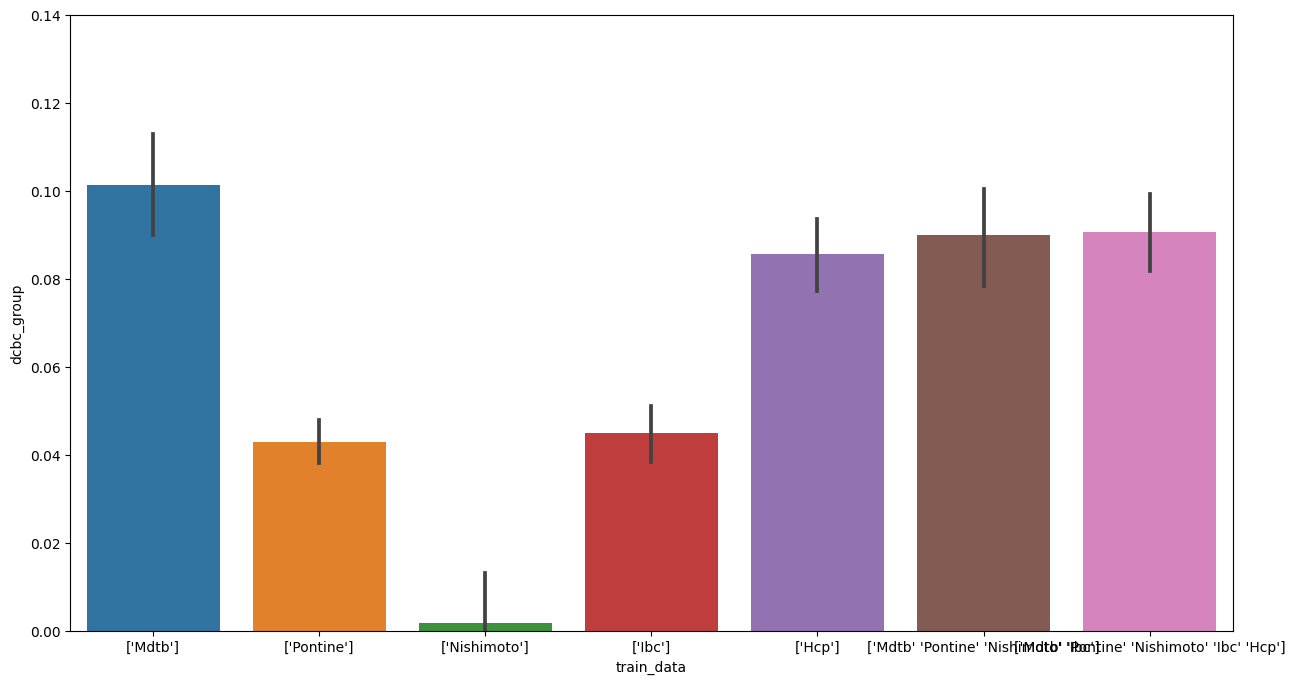

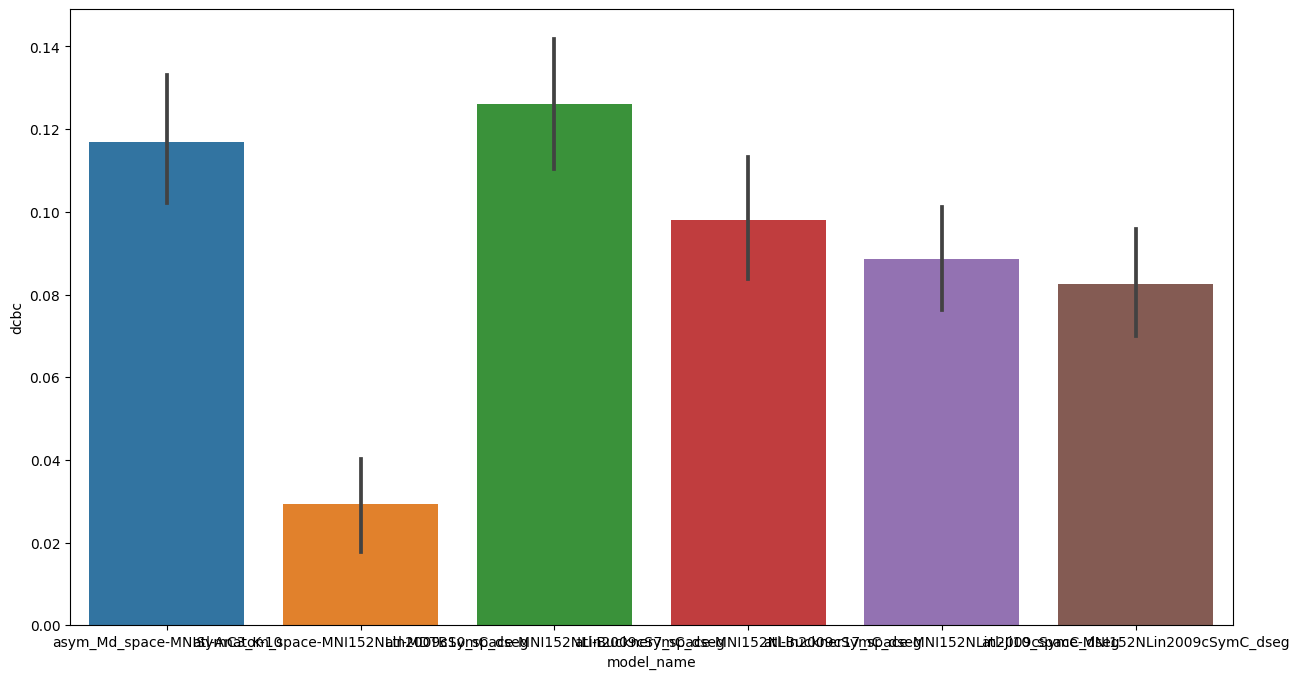

In [18]:
plt.figure(figsize=(15,8))
# sb.barplot(data=D.query( ' K == 10 '), x="test_data", y="dcbc_group", hue="train_data")
sb.barplot(data=D4.query( ' K == 10 & test_data == "Mdtb"  '), x="train_data", y="dcbc_group")
plt.ylim((0, 0.14))

plt.figure(figsize=(15,8))
sb.barplot(data=D.query( '  test_data == "Mdtb"  '), x="model_name", y="dcbc")